In [1]:
import cobra
import os
from os.path import join
from cobra.flux_analysis import calculate_phenotype_phase_plane
import pandas as pd
pd.options.display.max_rows = 100

data_dir = "/Users/david/Dropbox (UCSD SBRG)/Xam_Multistrain_Recon/Metabolic_model/BiGG_Model/"
xam_model = cobra.io.read_sbml_model(join(data_dir, "Xam_BiGG_full_media.xml"))

import matplotlib
#matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
from time import time

import pandas
pd.options.display.max_rows = 300

from cobra.flux_analysis.loopless import construct_loopless_model

### Original model

In [19]:
print (len(xam_model.reactions))
print (len(xam_model.metabolites))
print (len(xam_model.genes))

1556
1527
890


In [20]:
for i in [i.id for i in xam_model.reactions if len(i.metabolites) == 1]:
    reaction = xam_model.reactions.get_by_id(i)
    print('%s\t%s\t%s\t%i' % (reaction.id, reaction.reaction, reaction.lower_bound, reaction.upper_bound))

EX_2ddglcn_e	2ddglcn_e <=> 	-10.0	1000
EX_4hbz_e	4hbz_e <=> 	-10.0	1000
EX_ac_e	ac_e <=> 	-10.0	1000
EX_acald_e	acald_e <=> 	-10.0	1000
EX_acgam_e	acgam_e <=> 	-10.0	1000
EX_adn_e	adn_e <=> 	-10.0	1000
EX_akg_e	akg_e <=> 	-10.0	1000
EX_ala__D_e	ala__D_e <=> 	-10.0	1000
EX_arab__L_e	arab__L_e <=> 	-10.0	1000
EX_arbt_e	arbt_e <=> 	-10.0	1000
EX_arg__L_e	arg__L_e <=> 	-10.0	1000
EX_ASPt5n_e	asp__L_e <=> 	-10.0	1000
EX_Biomass_e	BIOMASS_c <=> 	-10.0	1000
EX_ca2_e	ca2_e <=> 	-10.0	1000
EX_cbl1_e	cbl1_e <=> 	-10.0	1000
EX_cd2_e	cd2_e <=> 	-10.0	1000
EX_chol_e	chol_e <=> 	-10.0	1000
EX_cit_e	cit_e <=> 	-10.0	1000
EX_cl_e	cl_e <=> 	-10.0	1000
EX_co2_e	co2_e <=> 	-10.0	1000
EX_cobalt2_e	cobalt2_e <=> 	-10.0	1000
EX_cu2_e	cu2_e <=> 	-10.0	1000
EX_cytd_e	cytd_e <=> 	-10.0	1000
EX_dad_2_e	dad_2_e <=> 	-10.0	1000
EX_dcyt_e	dcyt_e <=> 	-10.0	1000
EX_dgsn_e	dgsn_e <=> 	-10.0	1000
EX_din_e	din_e <=> 	-10.0	1000
EX_DNA_e	dna_c <=> 	-10.0	1000
EX_duri_e	duri_e <=> 	-10.0	1000
EX_etha_e	etha_e <=> 	-10.0

### FBA

In [21]:
xam_model.objective = "Biomass"
FBA_sol = xam_model.optimize()
print(FBA_sol)

<Solution 10.000 at 0x1265096d0>


### Loopless FBA

In [22]:
from cobra.flux_analysis.loopless import add_loopless, loopless_solution
from cobra.flux_analysis import pfba

In [23]:
FBA_loopless_sol = loopless_solution(xam_model)
print (FBA_loopless_sol)

<Solution 2785.153 at 0x126509850>


In [24]:
df = pandas.DataFrame(dict(loopless=FBA_loopless_sol.fluxes, nominal=FBA_sol.fluxes))

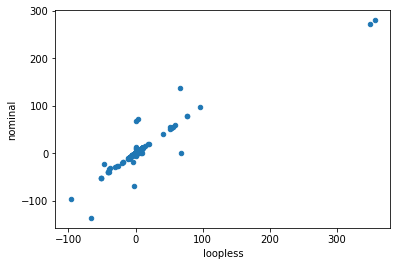

In [25]:
df.plot.scatter(x='loopless', y='nominal')

### FVA Loopless

In [26]:
from cobra.flux_analysis import flux_variability_analysis

In [27]:
FVA_xam = flux_variability_analysis(xam_model, xam_model.reactions[:])

In [35]:
FVA_xam

,maximum,minimum
10FTHFGLULL,0.000000e+00,0.000000e+00
2DHPFALDL,0.000000e+00,0.000000e+00
2HBO,0.000000e+00,0.000000e+00
2OH3K5MPPISO,0.000000e+00,0.000000e+00
34DHOXPEGOX,0.000000e+00,0.000000e+00
34HPPOR,0.000000e+00,0.000000e+00
3HAO,0.000000e+00,0.000000e+00
3HBCOAHL,0.000000e+00,-3.965939e+01
3HLYTCL,0.000000e+00,0.000000e+00
3OAR100,0.000000e+00,0.000000e+00


In [29]:
FVA_xam_loopless = flux_variability_analysis(xam_model, xam_model.reactions[:], loopless=True)

In [36]:
FVA_xam_loopless

,maximum,minimum
10FTHFGLULL,0.000000e+00,0.000000e+00
2DHPFALDL,0.000000e+00,0.000000e+00
2HBO,0.000000e+00,0.000000e+00
2OH3K5MPPISO,0.000000e+00,0.000000e+00
34DHOXPEGOX,0.000000e+00,0.000000e+00
34HPPOR,0.000000e+00,0.000000e+00
3HAO,0.000000e+00,0.000000e+00
3HBCOAHL,0.000000e+00,-1.161487e+01
3HLYTCL,0.000000e+00,0.000000e+00
3OAR100,0.000000e+00,0.000000e+00


In [39]:
# Exporting the FVAs

FVA_xam.to_csv("FVA_xam.csv")
FVA_xam_loopless.to_csv("FVA_xam_loopless.csv")